In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Z_76As=33

Привиденная энергия вылетающего электрона: $\epsilon_e = \frac{E_{\nu}-Q_k}{m_e} + 1$

In [3]:
def e_e_func(E_nu, E_k, Q_EC):
    #Считаем привиденную энергию вылетающего электрона. Если энергия налетающего нейтрино E_nu
    #меньше порога, возвращаем 0 для обнуления итогового сечения
    #E_nu in MeV
    q=Q_k_func(E_k, Q_EC) #порог реакции
    if E_nu>q: return 1+(E_nu-q)/0.511
    else: return 0 

Привиденный импульс электрона: $\pi_e=\sqrt{\epsilon_e^2 -1}$

In [4]:
def Pi_e_func(e_e):
    #Привиденный импульс электрона, вычисляется через привиденную энергию; ** означает степень  
    if e_e>1: return math.sqrt(e_e**2 - 1)
    else: return 0

Ферми функция по Бакалу: $F(Z, {\epsilon}_e)= \frac{y}{1-e^{-y}}$, где $ {y} = \frac{2{\pi}Z\alpha \epsilon_e}{\pi_e} $

In [5]:
def Columb_func_Bahcall(Pi_e, Z, e_e):
    #ферми функция по Бакалу
    if Pi_e>0:
        y_k=(2*math.pi*Z*e_e)/(Pi_e*137)
        return y_k/(1-math.exp(-y_k))
    else: return 0

Ферми функция из таблиц Суслова

In [6]:
Fermi_func_data = pd.read_csv('../../fermi_func_tables/Interp.csv')
#Fermi_func.info()

def Fermi_func(e_e):
    #input привиденная энергия электрона
    return np.interp(x = e_e*0.511, xp = Fermi_func_data['E_meV'], 
                     fp = Fermi_func_data['F_value'])

In [7]:
e_e = np.linspace(0,10)
pi_e = [Pi_e_func(elem) for elem in e_e]
Bahcall = [Columb_func_Bahcall(pi_value, Z_76As, e_value) for (pi_value, e_value) in 
          zip(pi_e, e_e)]
Suslov = Fermi_func(e_e-0.5)

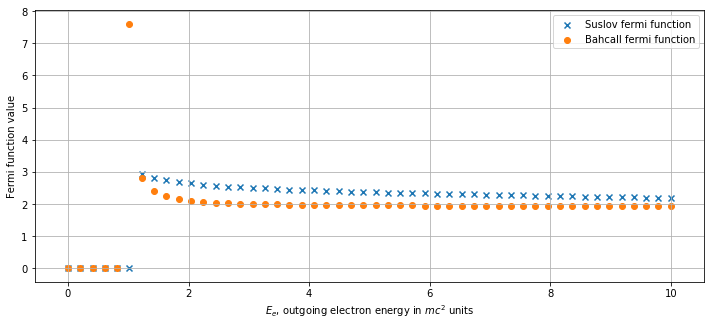

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(e_e, Suslov, marker='x', label='Suslov fermi function')
plt.scatter(e_e, Bahcall, marker='o', label='Bahcall fermi function')
plt.legend()
plt.xlabel('$E_e$, outgoing electron energy in $mc^2$ units')
plt.ylabel('Fermi function value')
plt.grid()
plt.show()

In [9]:
for elem in zip(e_e, Suslov): print(elem)

(0.0, 0.0)
(0.20408163265306123, 0.0)
(0.40816326530612246, 0.0)
(0.61224489795918369, 0.0)
(0.81632653061224492, 0.0)
(1.0204081632653061, 0.0)
(1.2244897959183674, 2.9417214285714284)
(1.4285714285714286, 2.8259500000000002)
(1.6326530612244898, 2.7460014285714287)
(1.8367346938775511, 2.6874642857142854)
(2.0408163265306123, 2.6420571428571429)
(2.2448979591836737, 2.6056742857142856)
(2.4489795918367347, 2.5751399999999998)
(2.6530612244897958, 2.5479528571428571)
(2.8571428571428572, 2.5251449999999998)
(3.0612244897959187, 2.5054185714285713)
(3.2653061224489797, 2.4869085714285712)
(3.4693877551020407, 2.4703964285714286)
(3.6734693877551021, 2.4549699999999999)
(3.8775510204081636, 2.4406292857142855)
(4.0816326530612246, 2.4273742857142859)
(4.2857142857142856, 2.4152050000000003)
(4.4897959183673475, 2.4039275)
(4.6938775510204085, 2.3929775000000002)
(4.8979591836734695, 2.3822642857142853)
(5.1020408163265305, 2.371835714285714)
(5.3061224489795915, 2.3619664285714288)
(5.5

In [10]:
relation = Suslov / Bahcall

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


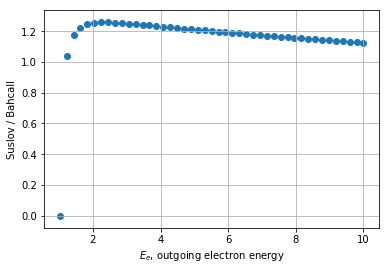

In [11]:
plt.scatter(e_e, relation)
plt.xlabel('$E_e$, outgoing electron energy')
plt.ylabel('Suslov / Bahcall')
plt.grid()
plt.show()

### B(GT) data processing

In [12]:
BGT=pd.read_csv('../B(GT) peaks processing/data_from_B(GT)_table.csv') #таблица со значениями B(GT)
BGT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
Unnamed: 0             0 non-null float64
Ex                     76 non-null float64
Jpi                    76 non-null object
diff cross-sec         73 non-null object
GT                     0 non-null float64
B(GT)                  73 non-null object
Unnamed: 6             0 non-null float64
B(GT)_full             73 non-null float64
Unnamed: 8             0 non-null float64
B(GT)_true             73 non-null float64
diff cross-sec true    73 non-null float64
dtypes: float64(8), object(3)
memory usage: 6.6+ KB


In [13]:
BGT.head()

,Unnamed: 0,Ex,Jpi,diff cross-sec,GT,B(GT),Unnamed: 6,B(GT)_full,Unnamed: 8,B(GT)_true,diff cross-sec true
0,NaN,0.0,2−,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,86.0,1,1.173(19),NaN,1.20(13),NaN,1.2013,NaN,1.20,1.173
2,NaN,120.0,1,0.318(7),NaN,0.33(3),NaN,0.3330,NaN,0.33,0.318
3,NaN,265.0,1,0.113(3),NaN,0.10(2),NaN,0.1020,NaN,0.10,0.113
4,NaN,363.0,2−,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
BGT.dropna(subset=['B(GT)'], how='any', inplace=True)

In [15]:
BGT = BGT[BGT['Jpi']=='1']

In [16]:
#BGT_list = [float( x.split('(')[0] ) for x in BGT['B(GT)'].values]
#cross_sec = [float( x.split('(')[0] ) for x in BGT['diff cross-sec'].values]

#BGT_list = np.array(BGT_list)/10
#cross_sec = np.array(cross_sec)
BGT_list = BGT['B(GT)_true'].values/10
cross_sec = BGT['diff cross-sec true'].values

In [17]:
line_fit_coef = np.polyfit(BGT['Ex'].values, cross_sec/BGT_list, deg = 1)
print(line_fit_coef[0], line_fit_coef[1])

-0.000369212945112 10.9862271548


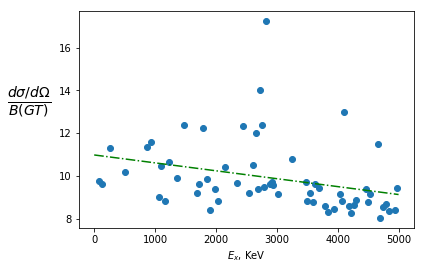

In [18]:
x = np.arange(0, 5100, 100)
y = line_fit_coef[0]*x + line_fit_coef[1
                                      ]
plt.scatter(BGT['Ex'].values, cross_sec/BGT_list)
plt.plot(x, y, c='green',ls='-.')
#plt.ylabel('$\frac{d\sigma / d\Omega}{B(GT)}$', rotation=0, labelpad=20)
plt.ylabel(r'$ \frac{d\sigma / d\Omega}{B(GT)}$', fontsize=20, rotation=0, labelpad=30)
plt.xlabel('$E_x$, KeV')

In [19]:
for elem in zip(BGT['Ex'].values, cross_sec/BGT_list, cross_sec, BGT_list): 
    print(elem)

(86.0, 9.7750000000000004, 1.173, 0.12)
(120.0, 9.6363636363636367, 0.318, 0.033000000000000002)
(265.0, 11.300000000000001, 0.113, 0.01)
(513.79999999999995, 10.211267605633804, 0.72499999999999998, 0.070999999999999994)
(864.0, 11.359999999999998, 0.28399999999999997, 0.025000000000000001)
(936.0, 11.611111111111111, 0.20899999999999999, 0.017999999999999999)
(1063.0, 9.0441176470588225, 1.23, 0.13600000000000001)
(1098.0, 10.466666666666667, 0.157, 0.014999999999999999)
(1157.0, 8.8392857142857135, 0.495, 0.056000000000000008)
(1235.0, 10.642857142857141, 0.29799999999999999, 0.028000000000000004)
(1353.0, 9.9193548387096779, 0.61499999999999999, 0.062)
(1475.0, 12.380952380952383, 0.26000000000000001, 0.020999999999999998)
(1693.0, 9.204081632653061, 0.45100000000000001, 0.049000000000000002)
(1718.0, 9.615384615384615, 0.125, 0.013000000000000001)
(1792.0, 12.23076923076923, 0.159, 0.013000000000000001)
(1852.0, 9.8787878787878789, 0.32600000000000001, 0.033000000000000002)
(1902.

In [20]:
sum(BGT_list*10)

15.440000000000001

In [21]:
sum(BGT['B(GT)_full'].values)

15.5693

In [22]:
sum(cross_sec)

14.712

### Fermi-function from Numerical Tables for Beta-Decay and Electron Capture

In [23]:
Fermi_func_new_data = pd.read_excel('../../fermi_func_tables/from_1968/13.xlsx')
Fermi_func_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
P              49 non-null float64
F0L0           49 non-null float64
L0             48 non-null object
1z             48 non-null float64
13             48 non-null float64
ELECTRON
14    48 non-null float64
Z= 33
Izt      48 non-null float64
A= 77          48 non-null float64
A,             48 non-null float64
A2             48 non-null float64
VI2            48 non-null float64
912            48 non-null float64
12             48 non-null float64
Unnamed: 13    48 non-null float64
dtypes: float64(13), object(1)
memory usage: 5.4+ KB


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


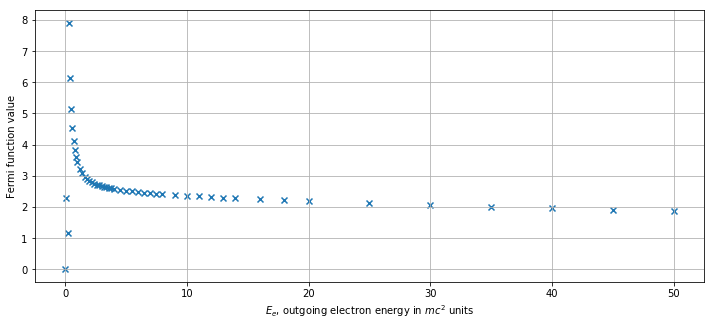

In [24]:

plt.figure(figsize=(12,5))
plt.scatter(Fermi_func_new_data['P'].values, Fermi_func_new_data['F0L0'].values,
            marker='x')
plt.legend()
plt.xlabel('$E_e$, outgoing electron energy in $mc^2$ units')
plt.ylabel('Fermi function value')
plt.grid()
plt.show()